imports and constants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import math

cleaned_species_csv_fileName = "cleaned_metadata.csv"
species_csv_fileName = "metadata.csv"
species_csv_fileName_header = "fileName"
species_csv_scientificName_header = "scientificName"
species_csv_Genus_header = "Genus"
species_csv_Family_header = "Family"
image_subpath = "images"
species_csv_usedColumns = [species_csv_fileName_header,
                          species_csv_scientificName_header,
                          species_csv_Genus_header,
                          species_csv_Family_header]

parameters

In [2]:
dataPath="/data/BGNN_data"
image_path="INHS_cropped"
suffix="biology_paper_cleaned_200max"

numOfRows=None # Keep None if you want all species
images_per_row = 7

cuda=6

Cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 6


Plot information about the dataset

,scientificName,count
0,Alosa chrysochloris,63
1,Carassius auratus,99
14,Lepomis microlophus,108
6,Lepisosteus platostomus,108
24,Notropis leuciodus,116
28,Notropis telescopus,119
5,Lepisosteus osseus,120
7,Lepomis auritus,127
31,Notropis wickliffi,129
21,Notropis buchanani,129


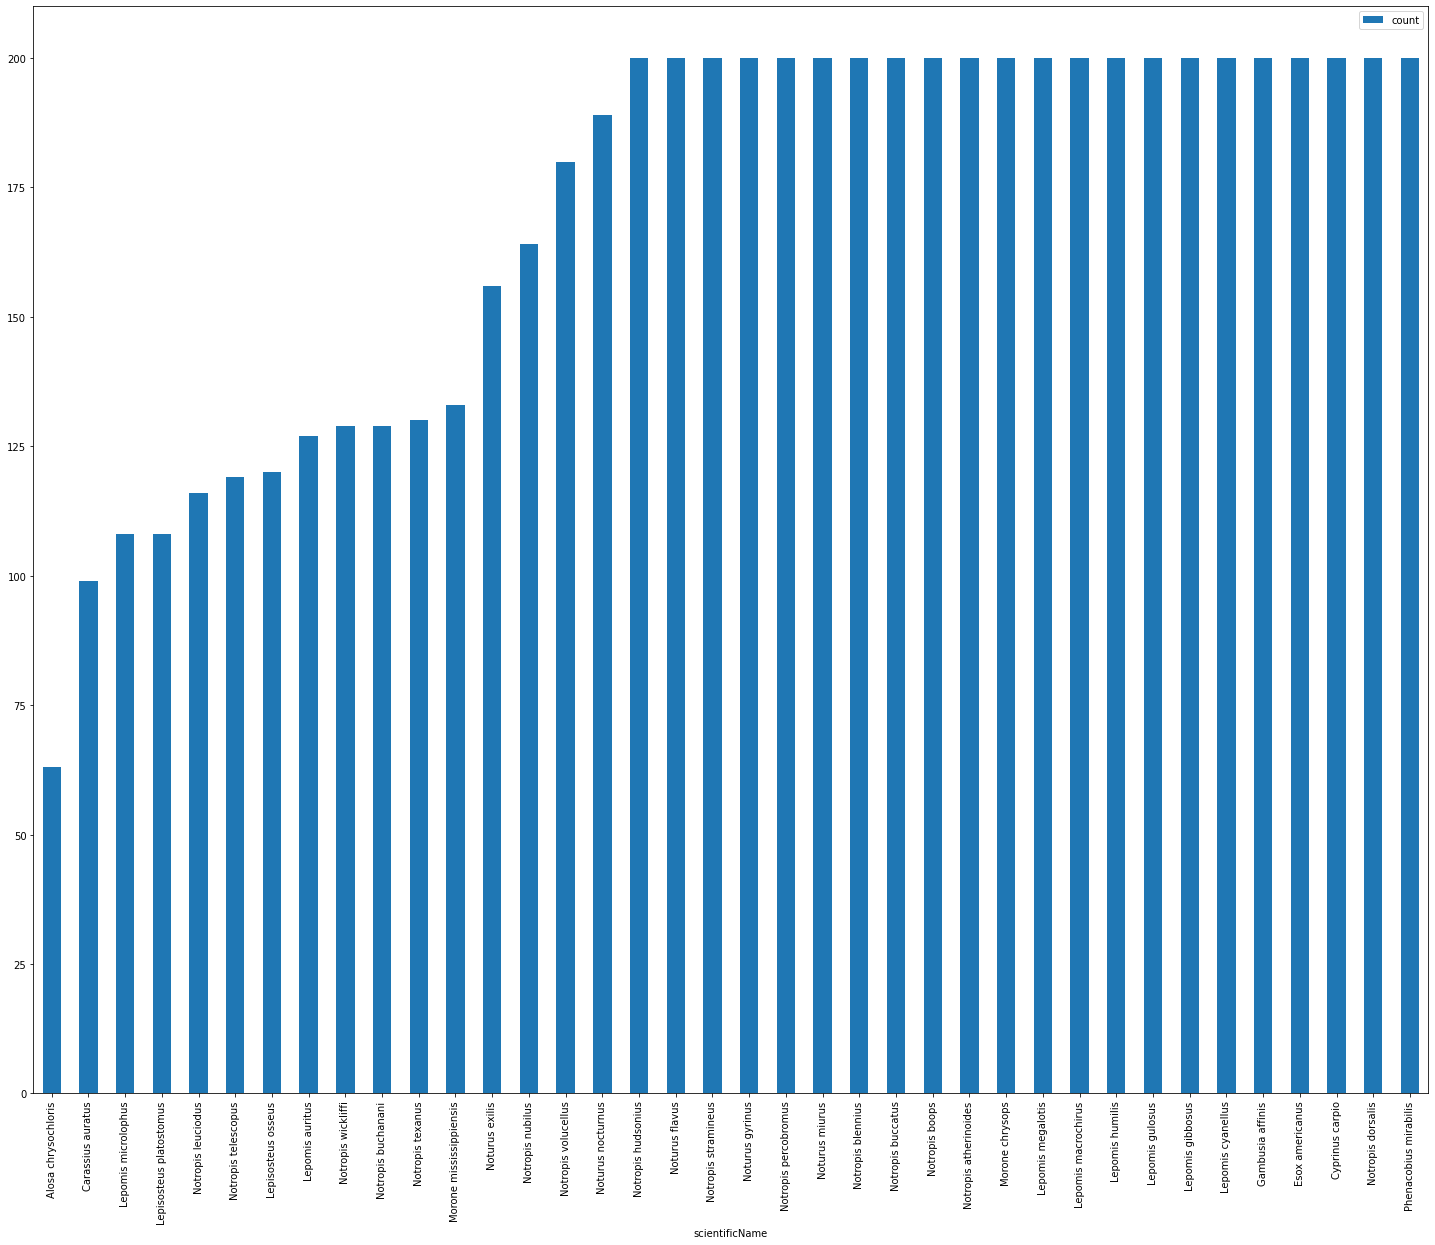

In [4]:
dir_path = os.path.join(dataPath, image_path, suffix)
file_path = os.path.join(dir_path, cleaned_species_csv_fileName)
if not os.path.exists(file_path):
    file_path = os.path.join(dir_path, species_csv_fileName)
if not os.path.exists(file_path):
    print(file_path, "File not found")
    raise

# Read data frame
df = pd.read_csv(file_path, delimiter='\t', index_col=species_csv_fileName_header, usecols=species_csv_usedColumns)

groupedPerSpecies_df = df[species_csv_scientificName_header].reset_index().groupby(species_csv_scientificName_header).agg('count')
species_count_table = groupedPerSpecies_df.sort_values(by=[species_csv_scientificName_header]).rename(columns={species_csv_fileName_header: "count"}).reset_index().sort_values(by=['count'])
species_count_table.plot.bar(x=species_csv_scientificName_header, y='count', rot=90, figsize=(25, 20))
plt.savefig(os.path.join(dir_path,'count_per_species.pdf'))
species_count_table.to_csv(os.path.join(dir_path, 'count_per_species.csv'))
species_count_table

,Genus,count
0,Alosa,63
1,Carassius,99
2,Cyprinus,200
3,Esox,200
4,Gambusia,200
10,Phenacobius,200
5,Lepisosteus,228
7,Morone,333
9,Noturus,945
6,Lepomis,1435


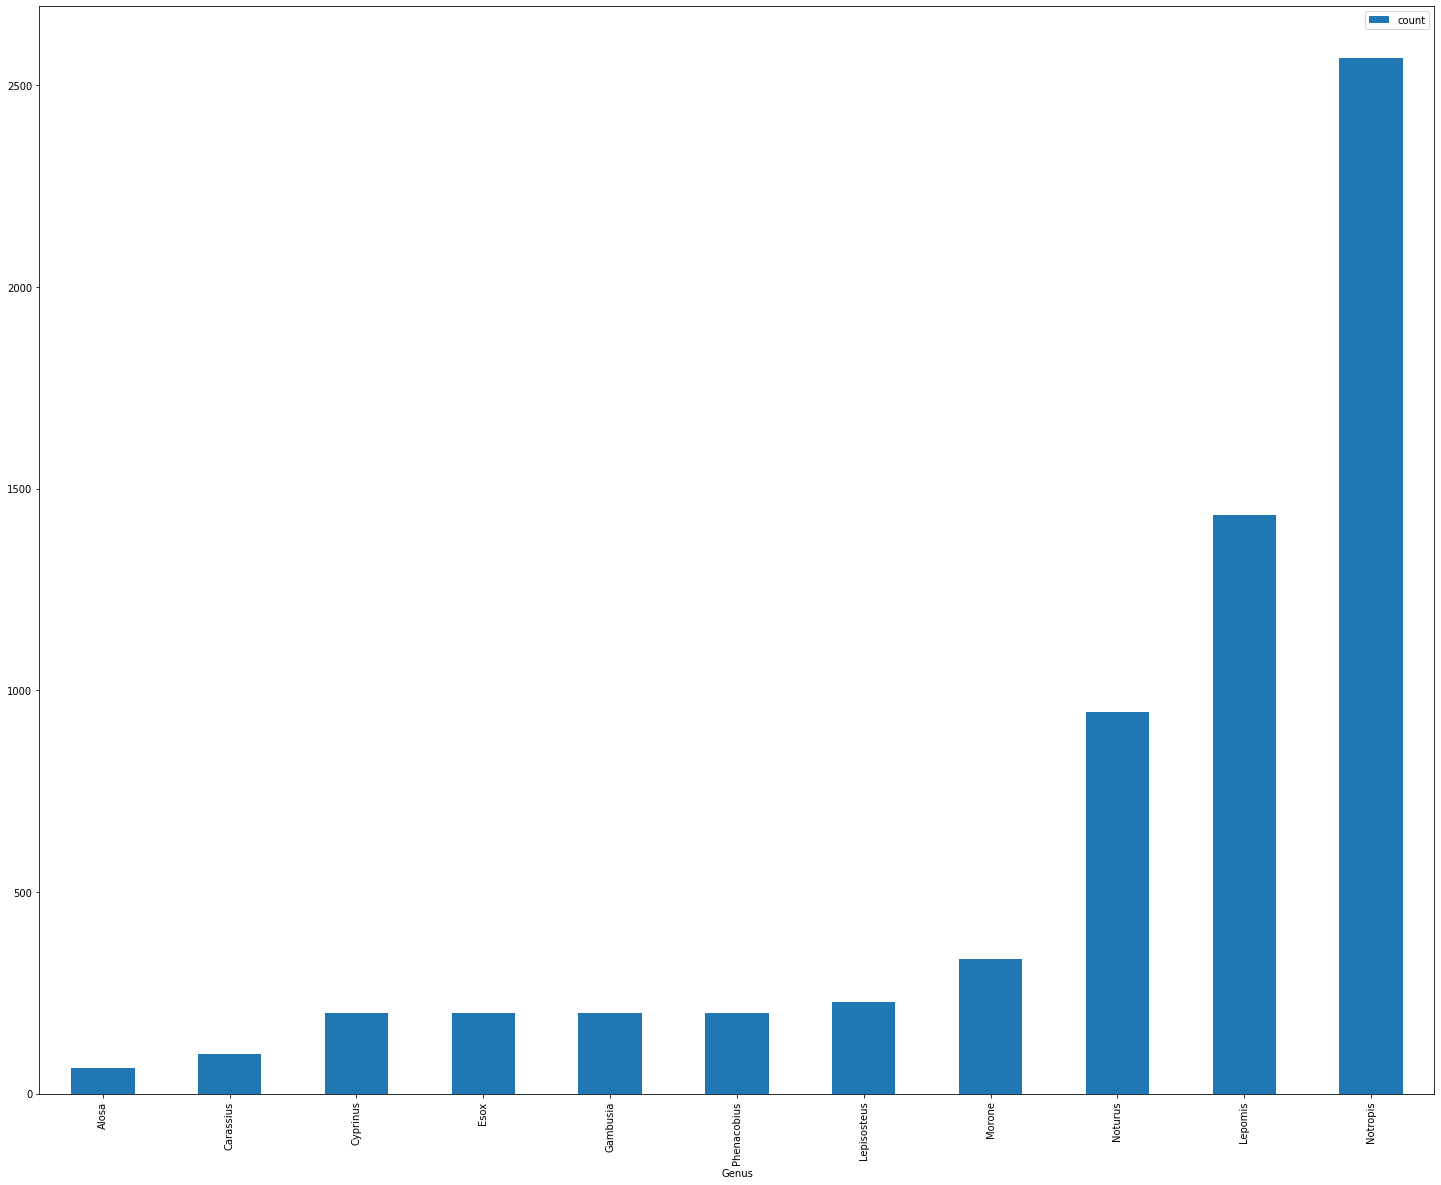

In [5]:
groupedPerGenus_df = df[species_csv_Genus_header].reset_index().groupby(species_csv_Genus_header).agg('count')
genus_count_table = groupedPerGenus_df.rename(columns={species_csv_fileName_header: "count"}).reset_index().sort_values(by=['count'])
genus_count_table.plot.bar(x=species_csv_Genus_header, y='count', rot=90, figsize=(25, 20))
plt.savefig(os.path.join(dir_path,'count_per_genus.pdf'))
genus_count_table.to_csv(os.path.join(dir_path, 'count_per_genus.csv'))
genus_count_table

Get image size statistics

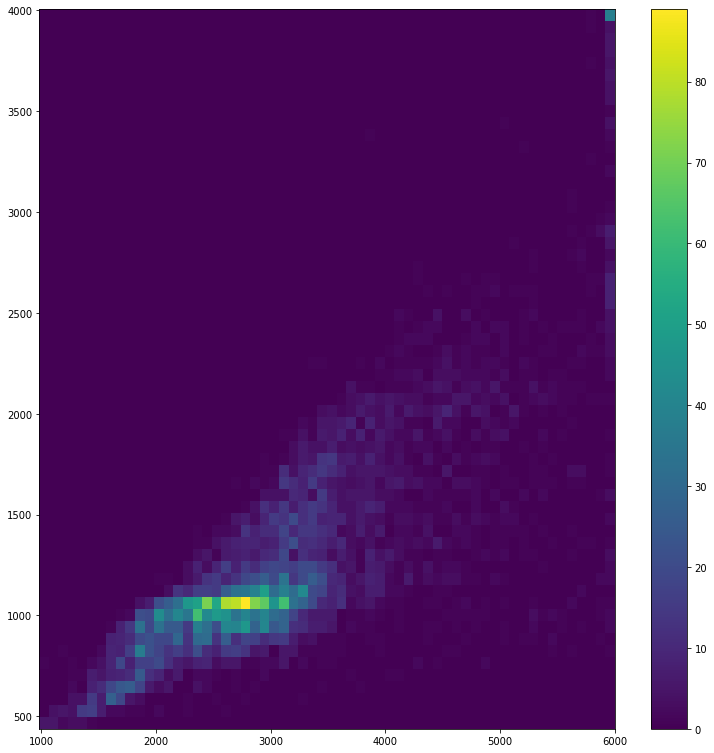

In [6]:
import PIL
from PIL import Image

img_count = len(df.index)

# Get image sizes
width=[]
height=[]
for indx, row in df.iterrows(): 
    image = PIL.Image.open(os.path.join(dataPath, image_path, 'images', indx))
    w, h = image.size
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()

Print images per species (visual verification)